In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
sweep_fourth_300_1000 = pd.read_csv('./sweep_300_1000.csv', on_bad_lines='skip')

# sweep = pd.concat([sweep_fourh_finer, sweep_fourth_finer_around_global_peak, sweep_fourth_finer_around_global_peak2, sweep_fourth_300_1000])
sweep = sweep_fourth_300_1000
sweep = sweep.sort_values(by=['wavelength'])

# manually add single computed value
sweep = sweep.append({'wavelength': 532, 'lightToHeat': 0.053873}, ignore_index=True)

# make light to heat a percentage
sweep['lightToHeat'] = sweep['lightToHeat']*100
# remove any rows with a wavelength below 483 nm
# sweep = sweep[sweep['wavelength'] > 483]
sweep.head()

/var/folders/zw/nhh2j6mn1b582ymy17q7nq2m0000gn/T/ipykernel_91845/326902874.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sweep = sweep.append({'wavelength': 532, 'lightToHeat': 0.053873}, ignore_index=True)


,wavelength,lambda0,lightToHeat
0,350.0,0.35,4.023976
1,370.0,0.37,4.296432
2,390.0,0.39,5.425550
3,410.0,0.41,5.383706
4,430.0,0.43,5.205272


In [9]:
sweep[sweep['lightToHeat'] == sweep['lightToHeat'].max()]

,wavelength,lambda0,lightToHeat
6,470.0,0.47,6.118207


### Graph showing global peak

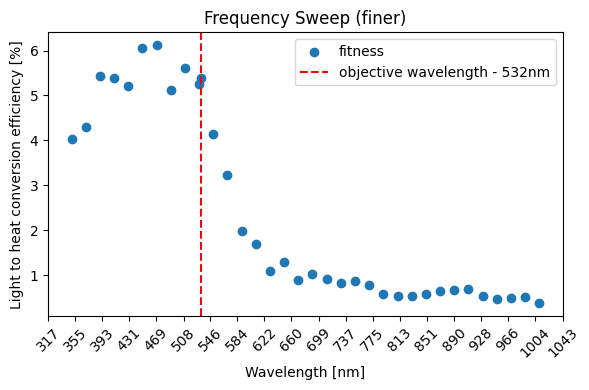

In [10]:
plt.figure(figsize=(6, 4))  # You can change the size of the figure
# Assuming that sweep is a dictionary with 'wavelength' and 'lightToHeat' as keys
plt.scatter(sweep['wavelength'], sweep['lightToHeat'], label="fitness")

plt.title('Frequency Sweep (finer)')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Light to heat conversion efficiency [%]')

z = np.polyfit(sweep['wavelength'], sweep['lightToHeat'], 8)
f = np.poly1d(z)
x_polyfit = np.linspace(sweep['wavelength'].min(), sweep['wavelength'].max(), 500)
y_polyfit = f(x_polyfit)
# plt.plot(x_polyfit, y_polyfit, color="orange", linewidth=3, label='polyfit 1')

# Getting current limits
xmin, xmax = plt.xlim()

# Generating new x values in that range
new_xticks = np.linspace(xmin, xmax, num=20, dtype=int)  # You can change the number of labels by changing num value

plt.xticks(new_xticks, rotation=45)  # rotation is optional, for better visualization if labels are many or long

# Draw vertical line at x = 532
plt.axvline(x=532, color='r', linestyle='--', label="objective wavelength - 532nm")  # You can customize color and linestyle

# Add the legend
plt.legend()

# To prevent the label from being cut off
plt.tight_layout()
plt.savefig('frequency_sweep.png', dpi=600)  # You can change the dpi value
plt.show()